In [1792]:
import pandas as pd
import datetime as dt

# Exploratory Data Analysis

## Transformaciones

**Proyectos**

In [1793]:
proyectos=pd.read_csv("data/origen/PROYECTOS_VIEW.csv")

In [1794]:
proyectos.head(3)

,ID_PROYECTO,RUT_PROYECTO,RUT_PROYECTO_PROMESA,NOM_PROYECTO,NOM_LEGAL,NOM_LEGAL_PROMESA,NOMBRE_BANCO,ACTIVO,HORARIO_ATENCION_PROYECTO,CTACTE,...,DESCRIPCION,URL_LOGO,URL_IMAGEN_1,URL_IMAGEN_2,URL_IMAGEN_3,ELIMINADO,FECHA_REGISTRO_PROYECTO,DIVIDENDO_ANIOS1,DIVIDENDO_ANIOS2,DIVIDENDO_ANIOS3
0,1,76326025-9,76326025-9,MARCHA BLANCA,INMOBILIARIA MARCHA BLANCA,INMOBILIARIA MARCHA BLANCA,BANCO DEL DESARROLLO,1,1,3424234.0,...,NaN,ifai/proyectos/1/archivos/MARCHABLANCA_LOGO.png,ifai/proyectos/1/archivos/MARCHABLANCA_IMAGEN-...,NaN,NaN,0,2020-01-23 00:44:03,25,20,30
1,2,76.761.005-K,76.761.005-K,ORIGEN,INMOBILIARIA SANTA CRISTINA SPA,INMOBILIARIA SANTA CRISTINA SPA,BANCO SECURITY,1,1,916840023.0,...,NaN,ifai/proyectos/2/archivos/ORIGEN_LOGO.jpg,NaN,NaN,NaN,0,2018-04-20 00:00:00,25,20,30
2,3,76.618.549-5,76.618.549-5,COLIFE,INMOBILIARIA GENERAL JOFRE SPA,INMOBILIARIA GENERAL JOFRE SPA,BANCO SECURITY,1,1,916215565.0,...,NaN,ifai/proyectos/3/archivos/COLIFE_LOGO.jpg,NaN,NaN,NaN,0,2017-12-08 00:00:00,25,20,30


In [1795]:
proyectos.columns

Index(['ID_PROYECTO', 'RUT_PROYECTO', 'RUT_PROYECTO_PROMESA', 'NOM_PROYECTO',
       'NOM_LEGAL', 'NOM_LEGAL_PROMESA', 'NOMBRE_BANCO', 'ACTIVO',
       'HORARIO_ATENCION_PROYECTO', 'CTACTE', 'CALLE', 'CIUDAD',
       'CODIGO_POSTAL', 'REGION', 'COMUNA', 'NUM_EXTERIOR', 'NUM_INTERIOR',
       'PAIS', 'REFERENCIA', 'HORARIO_ATENCION', 'FECHA_ESCRITURA',
       'FECHA_INICIO', 'FECHA_TERMINO', 'PORCENTAJE_AVANCE',
       'PORCENTAJE_MULTA', 'EVALUACION_PLANA', 'EMPRESA_ASEGURADORA',
       'MONTO_POLIZA_SEGURO', 'PRECIO_VENTA_OBJETIVO_PONDERADO',
       'PRECIO_VENTA_OBJETIVO_UTIL', 'SUBSIDIO', 'TASA', 'TASA_HIP',
       'TELEFONO2', 'TELEFONO1', 'TELEFONO_AMC', 'EMAIL', 'EMAIL_2',
       'SITIO_WEB', 'VERSION', 'DESCRIPCION', 'URL_LOGO', 'URL_IMAGEN_1',
       'URL_IMAGEN_2', 'URL_IMAGEN_3', 'ELIMINADO', 'FECHA_REGISTRO_PROYECTO',
       'DIVIDENDO_ANIOS1', 'DIVIDENDO_ANIOS2', 'DIVIDENDO_ANIOS3'],
      dtype='object')

Se eliminan variables que no son relevantes para el objetivo de la actividad:


In [1796]:
# Las columnas 'RUT_PROYECTO_PROMESA' muestra un patrón de tener los mismos datos que 'RUT_PROYECTO'
# Se eliminan  las columnas que no tengan datos

proyectos = proyectos.drop(['RUT_PROYECTO_PROMESA','CODIGO_POSTAL','REGION', 
    'EVALUACION_PLANA', 'EMPRESA_ASEGURADORA','MONTO_POLIZA_SEGURO',
    'REFERENCIA','NUM_EXTERIOR','NUM_INTERIOR',
    'DESCRIPCION', 'URL_LOGO', 'URL_IMAGEN_1','HORARIO_ATENCION_PROYECTO', 'ACTIVO',
    'URL_IMAGEN_2', 'URL_IMAGEN_3','ELIMINADO','TELEFONO2', 'TELEFONO1',
    'TELEFONO_AMC', 'EMAIL', 'EMAIL_2', 'SITIO_WEB', 'VERSION','CTACTE',
    'DIVIDENDO_ANIOS1', 'DIVIDENDO_ANIOS2', 'DIVIDENDO_ANIOS3',
    'TASA', 'TASA_HIP', 'FECHA_REGISTRO_PROYECTO',
    'PORCENTAJE_MULTA','PRECIO_VENTA_OBJETIVO_PONDERADO','PRECIO_VENTA_OBJETIVO_PONDERADO',
    'PRECIO_VENTA_OBJETIVO_UTIL',	'SUBSIDIO', 'PAIS'], axis=1)

Se modifica los valores de la columna Horario de atención. <br>
Se le da un rango horario que abarque a los diferentes horarios de attención existentes .. 
este es de 10:30 a 18:30 horas.

In [1797]:
proyectos.HORARIO_ATENCION.value_counts()

<b><font face="Arial" size="2">Horario de atención:</font></b><div><font face="Arial" size="2"><span style="caret-color: rgb(80, 80, 80); text-size-adjust: auto; background-color: rgb(253, 253, 253);">Lunes a<span class="Apple-converted-space">&nbsp;Domingo&nbsp;</span></span><span style="text-size-adjust: auto; background-color: rgb(253, 253, 253);"><span style="caret-color: rgb(80, 80, 80);">de 10:00 a 19:00 horas.</span><br></span></font></div>                                                                                                                                                                                                                                                                                                                                                                                                                     10
<b><font face="Arial" size="2">Horario de atención:</font></b><div><font face="Arial" size="2"><span style="caret-color: rgb(80, 80, 80); tex

In [1798]:
# se modifica los valores a string
proyectos.HORARIO_ATENCION=proyectos.HORARIO_ATENCION.astype(str)

# se categoriza los valores
proyectos.HORARIO_ATENCION = proyectos.HORARIO_ATENCION.apply(lambda x:"lunes a domingo 10:30 a 18:30 horas" 
if "Domingo" in x else ("lunes a viernes 10:30 a 18:30 horas" if "Viernes" in x else None))

proyectos.HORARIO_ATENCION.value_counts()

lunes a domingo 10:30 a 18:30 horas    19
lunes a viernes 10:30 a 18:30 horas     3
Name: HORARIO_ATENCION, dtype: int64

Para 'RUT_PROYECTO' se quitan los puntos decimales 


In [1799]:

proyectos.RUT_PROYECTO=proyectos.RUT_PROYECTO.str.replace(".", "")


C:\Users\Jaime Ospino\AppData\Local\Temp\ipykernel_14504\1293324709.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  proyectos.RUT_PROYECTO=proyectos.RUT_PROYECTO.str.replace(".", "")


Se Cambia el formatos de las fechas, eliminando la hora en las columnas que tengan formato date

In [1800]:
# Función para darle formato a las fechas 

def convertir_fecha(df, columna):

    # Convertir a tipo datetime
    df[columna] = pd.to_datetime(df[columna])

    # Extraer la fecha sin la hora
    df[columna] = df[columna].dt.date

    return df


In [1801]:
# formato a fechas del dataframe proyectos

convertir_fecha(proyectos,'FECHA_ESCRITURA')
convertir_fecha(proyectos,'FECHA_INICIO')
convertir_fecha(proyectos,'FECHA_TERMINO')



# gestión de valores nulos
proyectos=proyectos.fillna('sin_dato')

Se eliminan los proyectos que no tengan fecha de inicio

In [1802]:
proyectos=proyectos[proyectos['FECHA_INICIO'] != 'sin_dato'].reset_index(drop=True)
proyectos

,ID_PROYECTO,RUT_PROYECTO,NOM_PROYECTO,NOM_LEGAL,NOM_LEGAL_PROMESA,NOMBRE_BANCO,CALLE,CIUDAD,COMUNA,HORARIO_ATENCION,FECHA_ESCRITURA,FECHA_INICIO,FECHA_TERMINO,PORCENTAJE_AVANCE
0,1,76326025-9,MARCHA BLANCA,INMOBILIARIA MARCHA BLANCA,INMOBILIARIA MARCHA BLANCA,BANCO DEL DESARROLLO,Apoquindo,Santiago,Las Condes,sin_dato,2026-01-01,2020-01-01,2026-01-01,0.35
1,2,76761005-K,ORIGEN,INMOBILIARIA SANTA CRISTINA SPA,INMOBILIARIA SANTA CRISTINA SPA,BANCO SECURITY,Santa Cristina 3138,Santiago,Macul,lunes a domingo 10:30 a 18:30 horas,2021-03-01,2018-04-30,2021-05-01,0.955
2,3,76618549-5,COLIFE,INMOBILIARIA GENERAL JOFRE SPA,INMOBILIARIA GENERAL JOFRE SPA,BANCO SECURITY,General Jofre 220,Santiago,Santiago,lunes a domingo 10:30 a 18:30 horas,2021-03-01,2017-12-31,2021-12-30,0.956
3,4,76763933-3,ICONO,INMOBILIARIA MADRESELVA SPA,INMOBILIARIA MADRESELVA SPA,BANCO SECURITY,Las Madreselvas 4519,Santiago,Macul,lunes a domingo 10:30 a 18:30 horas,2021-07-01,2017-04-30,2021-12-31,0.79
4,5,76896595-1,OPEN ALEMANIA,INMOBILIARIA ALTO ALEMANIA DOS SPA,INMOBILIARIA ALTO ALEMANIA DOS SPA,BANCO BCI,Avenida Alemania 1655,Temuco,Temuco,lunes a domingo 10:30 a 18:30 horas,2023-04-30,2018-01-31,2023-04-30,0.95
5,6,76991583-4,MORE,FAI PINEDA SPA,FAI PINEDA SPA,BANCO BCI,juan de Pineda 8063,Santiago,La Florida,lunes a domingo 10:30 a 18:30 horas,2023-05-30,2020-01-01,2023-05-30,0.86
6,7,76991587-7,ARMONIA,FAI COLON SPA,FAI COLON SPA,sin_dato,Colón 6435,Santiago,La Cisterna,lunes a domingo 10:30 a 18:30 horas,2023-05-30,2020-01-01,2023-05-30,0.45
7,9,1-9,EDIFICIO ALFRED,EDIFICIO ALFRED,EDIFICIO ALFRED,sin_dato,sin_dato,sin_dato,sin_dato,lunes a domingo 10:30 a 18:30 horas,2021-10-07,2020-10-07,2021-10-07,sin_dato
8,12,76954681-2,Condominio Parque Lircay,Condominio Parque Lircay,WALK TALCA,sin_dato,sin_dato,sin_dato,sin_dato,lunes a domingo 10:30 a 18:30 horas,2021-03-31,2019-07-08,2020-12-31,sin_dato
9,13,76954686-3,Condominio Parque Las Palmas I,Condominio Parque Las Palmas I,WALK SAN JAVIER ETAPA I,sin_dato,sin_dato,sin_dato,sin_dato,lunes a domingo 10:30 a 18:30 horas,2021-01-31,2019-06-28,2020-11-30,sin_dato


**cotizaciones**

In [1803]:
cotizacion=pd.read_csv("data/origen/COTIZACION_VIEW.csv")

C:\Users\Jaime Ospino\AppData\Local\Temp\ipykernel_14504\2079675604.py:1: DtypeWarning: Columns (11,12,31,35) have mixed types. Specify dtype option on import or set low_memory=False.
  cotizacion=pd.read_csv("data/origen/COTIZACION_VIEW.csv")


In [1804]:
cotizacion.columns

Index(['ID_COTIZACION', 'FECHA_COTIZ', 'APROBADA', 'NEGOCIO', 'G_GLS_HIP2',
       'G_GLS_HIP2_CUOT', 'G_GLS_HIP3', 'G_GLS_HIP3_CUOT', 'G_GLS_HIP1',
       'G_GLS_HIP1_CUOT', 'G_GLS_DC', 'RATING', 'DESTINO_COMPRA',
       'NOMBRE_CAMPANIA', 'TOTAL_COTIZ', 'TOTAL_DESCUENTO',
       'TOTAL_DESCUENTO_PORCENTAJE', 'DESCUENTO_TIPO_CALCULO', 'TASA_INTERES',
       'TASA_INTERES_ANIOS', 'TASA_HIP', 'ORIGEN', 'CODIGO', 'HASH_DOCUMENTO',
       'ID_CLIENTE', 'ID_PROYECTO', 'ID_USUARIO', 'ID_EVENTO', 'ID_MEDIO',
       'ID_TIPO_CONTACTO', 'VERSION', 'EMAIL', 'DIVIDENDO_VISIBLE',
       'BANCO_SUBSIDIO', 'LIBRETA_SUBSIDIO', 'ESTADO_SUBSIDIO',
       'SERIE_SUBSIDIO', 'UID'],
      dtype='object')

Se eliminan columnas que no son relevantes para el análisis

In [1805]:
cotizacion = cotizacion.drop(['VERSION', 'EMAIL','ID_TIPO_CONTACTO','LIBRETA_SUBSIDIO', 'G_GLS_DC',
                            'ID_TIPO_CONTACTO','ESTADO_SUBSIDIO','SERIE_SUBSIDIO', 'HASH_DOCUMENTO',
                            'ID_USUARIO', 'ID_EVENTO', 'ID_MEDIO','NOMBRE_CAMPANIA','NEGOCIO',
                            'CODIGO','UID','BANCO_SUBSIDIO','DESCUENTO_TIPO_CALCULO','RATING',
                            'DIVIDENDO_VISIBLE','DIVIDENDO_VISIBLE','ORIGEN','DESTINO_COMPRA',
                            'TASA_INTERES',	'TASA_INTERES_ANIOS',	'TASA_HIP'], axis=1)

Se elimina la columna 'APROVADA'. Se asume que todas las cotizaciones estan aprovadas.<br> 
Y  las filas de las cotizaciones que no fueron aprovadas por ser un porcentaje pequeño respecto al total de datos.

In [1806]:
f'Hay 31 cotizaciones no aprovadas. Corresponde al {100*(len(cotizacion[cotizacion["APROBADA"] == 0]) / len(cotizacion))}% del total de cotizaciones'


'Hay 31 cotizaciones no aprovadas. Corresponde al 0.03189562926989876% del total de cotizaciones'

In [1807]:
# Se elimina  las filas de cotizaciones no aprobadas
cotizacion = cotizacion[cotizacion["APROBADA"] != 0]

# se elimina toda la columna
cotizacion = cotizacion.drop('APROBADA', axis=1)


In [1808]:
# formato a fechas del dataframe cotizaciones

convertir_fecha(cotizacion,'FECHA_COTIZ')



,ID_COTIZACION,FECHA_COTIZ,G_GLS_HIP2,G_GLS_HIP2_CUOT,G_GLS_HIP3,G_GLS_HIP3_CUOT,G_GLS_HIP1,G_GLS_HIP1_CUOT,TOTAL_COTIZ,TOTAL_DESCUENTO,TOTAL_DESCUENTO_PORCENTAJE,ID_CLIENTE,ID_PROYECTO
0,1,2020-01-23,"Dividendo aproximado a 20 años: UF: 17,28 al 3...","24 cuotas de 31,83 UF c/u.","Dividendo aproximado a 30 años: UF: 13,11 al 3...","24 cuotas de 31,83 UF c/u.","Dividendo aproximado a 25 años: UF: 14,76 al 3...","24 cuotas de 31,83 UF c/u.",3908.1300,120.8700,0.03,1898,1
1,2,2020-01-27,"Dividendo aproximado a 20 años: UF: 17,79 al 3...","23 cuotas de 34,24 UF c/u.","Dividendo aproximado a 30 años: UF: 13,51 al 3...","23 cuotas de 34,24 UF c/u.","Dividendo aproximado a 25 años: UF: 15,20 al 3...","23 cuotas de 34,24 UF c/u.",4025.3739,124.4961,0.03,782,1
2,3,2020-01-29,"Dividendo aproximado a 20 años: UF: 12,35 al 3...","6 cuotas de 90,19 UF c/u.","Dividendo aproximado a 30 años: UF: 9,37 al 3,...","6 cuotas de 90,19 UF c/u.","Dividendo aproximado a 25 años: UF: 10,55 al 3...","6 cuotas de 90,19 UF c/u.",2794.0000,0.0000,0.00,782,2
3,4,2020-01-30,"Dividendo aproximado a 20 años: UF: 13,05 al 3...","23 cuotas de 24,9 UF c/u.","Dividendo aproximado a 30 años: UF: 9,91 al 3,...","23 cuotas de 24,9 UF c/u.","Dividendo aproximado a 25 años: UF: 11,15 al 3...","23 cuotas de 24,9 UF c/u.",2951.9800,0.0000,0.00,1898,1
4,5,2020-01-30,"Dividendo aproximado a 20 años: UF: 12,92 al 3...","23 cuotas de 24,65 UF c/u.","Dividendo aproximado a 30 años: UF: 9,81 al 3,...","23 cuotas de 24,65 UF c/u.","Dividendo aproximado a 25 años: UF: 11,04 al 3...","23 cuotas de 24,65 UF c/u.",2922.4602,29.5198,0.01,1898,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
97187,99873,2023-05-30,"Dividendo aproximado a 20 años: UF: 23,72 al 4...","1 cuotas de 8,35 UF o $300.000 c/u.","Dividendo aproximado a 30 años: UF: 18,94 al 4...","1 cuotas de 8,35 UF o $300.000 c/u.","Dividendo aproximado a 25 años: UF: 20,80 al 4...","1 cuotas de 8,35 UF o $300.000 c/u.",4444.3700,126.6300,0.03,42426,29
97188,99874,2023-05-30,"Dividendo aproximado a 20 años: UF: 16,28 al 4...","1 cuotas de 8,35 UF o $300.000 c/u.","Dividendo aproximado a 30 años: UF: 13,00 al 4...","1 cuotas de 8,35 UF o $300.000 c/u.","Dividendo aproximado a 25 años: UF: 14,29 al 4...","1 cuotas de 8,35 UF o $300.000 c/u.",3051.6200,94.3800,0.03,42426,29
97189,99875,2023-05-30,"Dividendo aproximado a 20 años: UF: 16,20 al 4...",17 cuotas de 26.29689961 UF c/u.,"Dividendo aproximado a 30 años: UF: 12,94 al 4...",17 cuotas de 26.29689961 UF c/u.,"Dividendo aproximado a 25 años: UF: 14,21 al 4...",17 cuotas de 26.29689961 UF c/u.,3036.0000,0.0000,0.00,42430,29
97190,99876,2023-05-30,"Dividendo aproximado a 20 años: UF: 15,47 al 3...",24 cuotas de 19.35822055 UF c/u.,"Dividendo aproximado a 30 años: UF: 11,95 al 3...",24 cuotas de 19.35822055 UF c/u.,"Dividendo aproximado a 25 años: UF: 13,34 al 3...",24 cuotas de 19.35822055 UF c/u.,3153.0000,0.0000,0.00,8635,28


In [1809]:
cotizacion.columns

Index(['ID_COTIZACION', 'FECHA_COTIZ', 'G_GLS_HIP2', 'G_GLS_HIP2_CUOT',
       'G_GLS_HIP3', 'G_GLS_HIP3_CUOT', 'G_GLS_HIP1', 'G_GLS_HIP1_CUOT',
       'TOTAL_COTIZ', 'TOTAL_DESCUENTO', 'TOTAL_DESCUENTO_PORCENTAJE',
       'ID_CLIENTE', 'ID_PROYECTO'],
      dtype='object')

Las columnas ['G_GLS_HIP2_CUOT', 'G_GLS_HIP1_CUOT', 'G_GLS_HIP3_CUOT'] presentan los mismos valores. Se unifican estas columnas.<br>

Se crean dos columnas para establecer el valor de la cuota y el numero de cuotas.

In [1810]:
cotizacion[['G_GLS_HIP2_CUOT', 'G_GLS_HIP1_CUOT', 'G_GLS_HIP3_CUOT']].sample(5)

,G_GLS_HIP2_CUOT,G_GLS_HIP1_CUOT,G_GLS_HIP3_CUOT
93973,2 cuotas de 235.98851555 UF c/u.,2 cuotas de 235.98851555 UF c/u.,2 cuotas de 235.98851555 UF c/u.
29443,"22 cuotas de 26,99 UF c/u.","22 cuotas de 26,99 UF c/u.","22 cuotas de 26,99 UF c/u."
90981,"11 cuotas de 43,39 UF o $1.538.704,57 c/u.","11 cuotas de 43,39 UF o $1.538.704,57 c/u.","11 cuotas de 43,39 UF o $1.538.704,57 c/u."
57345,9 cuotas de 54.68333333 UF c/u.,9 cuotas de 54.68333333 UF c/u.,9 cuotas de 54.68333333 UF c/u.
19384,27 cuotas de 11.31083333 UF c/u.,27 cuotas de 11.31083333 UF c/u.,27 cuotas de 11.31083333 UF c/u.


In [1811]:
# Se crea la columna 'CUOTAS' y se extraen el numero de cuotas

cotizacion['CUOTAS'] = cotizacion['G_GLS_HIP2_CUOT'].str.extract(r'(\d+) cuotas')

# Se borran las columnas ['G_GLS_HIP2_CUOT', 'G_GLS_HIP1_CUOT', 'G_GLS_HIP3_CUOT']

# Se crea la columna 'VALOR_CUOTA' y se reemplaza ',' por '.'

cotizacion['VALOR_CUOTA'] = cotizacion['G_GLS_HIP2_CUOT'].str.replace(',', '.')

# Se extrae el valor de la cuota

cotizacion['VALOR_CUOTA'] = cotizacion['VALOR_CUOTA'].str.extract(r'(\d+\.\d+|\d+) UF')



cotizacion = cotizacion.drop(['G_GLS_HIP2_CUOT', 'G_GLS_HIP1_CUOT', 'G_GLS_HIP3_CUOT'], axis=1)

Las columnas ['G_GLS_HIP2', 'G_GLS_HIP1', 'G_GLS_HIP3'] contienen información referente a los dividendos a 20 años 25 años y 30 años.<br>

Se crean columnas con la informacion que contienen esta columnas categorizandolas por año.

In [1812]:
cotizacion[['G_GLS_HIP2', 'G_GLS_HIP1', 'G_GLS_HIP3']].sample(5)

,G_GLS_HIP2,G_GLS_HIP1,G_GLS_HIP3
41718,"Dividendo aproximado a 20 años: UF: 11,85 al 3...","Dividendo aproximado a 25 años: UF: 10,12 al 3...","Dividendo aproximado a 30 años: UF: 8,99 al 3,..."
75837,"Dividendo aproximado a 20 años: UF: 27,09 al 3...","Dividendo aproximado a 25 años: UF: 23,15 al 3...","Dividendo aproximado a 30 años: UF: 20,57 al 3..."
32358,"Dividendo aproximado a 20 años: UF: 11,71 al 3...","Dividendo aproximado a 25 años: UF: 10,00 al 3...","Dividendo aproximado a 30 años: UF: 8,89 al 3,..."
39376,"Dividendo aproximado a 20 años: UF: 14,27 al 3...","Dividendo aproximado a 25 años: UF: 12,19 al 3...","Dividendo aproximado a 30 años: UF: 10,83 al 3..."
69979,"Dividendo aproximado a 20 años: UF: 29,79 al 4...","Dividendo aproximado a 30 años: UF: 23,41 al 4...","Dividendo aproximado a 30 años: UF: 23,41 al 4..."


- Para las cotizaciones con dividendos a 20 años

In [1813]:

# Se crea la columna 'INTERES' 
cotizacion['INTERES_1'] = cotizacion['G_GLS_HIP2'].str.extract(r'al ([\d,]+) %.')
cotizacion['INTERES_2'] = cotizacion['G_GLS_HIP2'].str.extract(r'al ([\d,]+)%.')
    # Unir los valores de las dos columnas
cotizacion['INTERES'] = cotizacion['INTERES_1'].fillna(cotizacion['INTERES_2'])
cotizacion['INTERES'] = cotizacion['INTERES'].str.replace(',', '.')

# Se crea la columna 'DIVIDENDO_20Y' 
cotizacion['DIVIDENDO_20Y'] = cotizacion['G_GLS_HIP2'].str.extract(r'a (\d+) años')

#se reemplaza en 'G_GLS_HIP2_CUOT' ',' por '.'
cotizacion['G_GLS_HIP2'] = cotizacion['G_GLS_HIP2'].str.replace(',', '.')

# Se crea la columna 'UF_20Y'
cotizacion['UF_20Y'] = cotizacion['G_GLS_HIP2'].str.extract(r'UF: ([\d.]+)')

# Se crea la columna 'DIVIDENDO_20Y'
cotizacion['DIVIDENDO_20Y'] = cotizacion['G_GLS_HIP2'].str.extract(r'Valor Dividendo : \$([\d.]+)')
cotizacion['DIVIDENDO_20Y'] =cotizacion['DIVIDENDO_20Y'] .str.replace('.', '')

# Se crea la columna 'RENTA_MIN_20Y'
cotizacion['RENTA_MIN_20Y'] = cotizacion['G_GLS_HIP2'].str.extract(r'Renta mínima : \$([\d.]+)')
cotizacion['RENTA_MIN_20Y'] =cotizacion['RENTA_MIN_20Y'] .str.replace('.', '')

# Se eliminan columnas
cotizacion = cotizacion.drop(['G_GLS_HIP2', 'INTERES_1', 'INTERES_2'], axis=1)


C:\Users\Jaime Ospino\AppData\Local\Temp\ipykernel_14504\2627701549.py:19: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  cotizacion['DIVIDENDO_20Y'] =cotizacion['DIVIDENDO_20Y'] .str.replace('.', '')
C:\Users\Jaime Ospino\AppData\Local\Temp\ipykernel_14504\2627701549.py:23: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  cotizacion['RENTA_MIN_20Y'] =cotizacion['RENTA_MIN_20Y'] .str.replace('.', '')


- Para las cotizaciones con dividendos a 25 años

In [1814]:


# Se crea la columna 'DIVIDENDO_25Y' 
cotizacion['DIVIDENDO_25Y'] = cotizacion['G_GLS_HIP1'].str.extract(r'a (\d+) años')


#se reemplaza en 'G_GLS_HIP1' ',' por '.'
cotizacion['G_GLS_HIP1'] = cotizacion['G_GLS_HIP1'].str.replace(',', '.')


# Se crea la columna 'UF_25Y'
cotizacion['UF_25Y'] = cotizacion['G_GLS_HIP1'].str.extract(r'UF: ([\d.]+)')

# Se crea la columna 'DIVIDENDO_25Y'
cotizacion['DIVIDENDO_25Y'] = cotizacion['G_GLS_HIP1'].str.extract(r'Valor Dividendo : \$([\d.]+)')
cotizacion['DIVIDENDO_25Y'] =cotizacion['DIVIDENDO_25Y'] .str.replace('.', '')

# Se crea la columna 'RENTA_MIN_25Y'
cotizacion['RENTA_MIN_25Y'] = cotizacion['G_GLS_HIP1'].str.extract(r'Renta mínima : \$([\d.]+)')
cotizacion['RENTA_MIN_25Y'] =cotizacion['RENTA_MIN_25Y'] .str.replace('.', '')

# Se eliminan columnas

cotizacion = cotizacion.drop('G_GLS_HIP1', axis=1)


C:\Users\Jaime Ospino\AppData\Local\Temp\ipykernel_14504\4004351013.py:14: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  cotizacion['DIVIDENDO_25Y'] =cotizacion['DIVIDENDO_25Y'] .str.replace('.', '')
C:\Users\Jaime Ospino\AppData\Local\Temp\ipykernel_14504\4004351013.py:18: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  cotizacion['RENTA_MIN_25Y'] =cotizacion['RENTA_MIN_25Y'] .str.replace('.', '')


- Para las cotizaciones con dividendos a 30 años

In [1815]:
# Se crea la columna 'DIVIDENDO_30Y' 
cotizacion['DIVIDENDO_30Y'] = cotizacion['G_GLS_HIP3'].str.extract(r'a (\d+) años')


#se reemplaza en 'G_GLS_HIP1' ',' por '.'
cotizacion['G_GLS_HIP3'] = cotizacion['G_GLS_HIP3'].str.replace(',', '.')


# Se crea la columna 'UF_30Y'
cotizacion['UF_30Y'] = cotizacion['G_GLS_HIP3'].str.extract(r'UF: ([\d.]+)')

# Se crea la columna 'DIVIDENDO_30Y'
cotizacion['DIVIDENDO_30Y'] = cotizacion['G_GLS_HIP3'].str.extract(r'Valor Dividendo : \$([\d.]+)')
cotizacion['DIVIDENDO_30Y'] =cotizacion['DIVIDENDO_30Y'] .str.replace('.', '')

# Se crea la columna 'RENTA_MIN_30Y'
cotizacion['RENTA_MIN_30Y'] = cotizacion['G_GLS_HIP3'].str.extract(r'Renta mínima : \$([\d.]+)')
cotizacion['RENTA_MIN_30Y'] =cotizacion['RENTA_MIN_30Y'] .str.replace('.', '')

# Se eliminan columnas

cotizacion = cotizacion.drop('G_GLS_HIP3', axis=1)

C:\Users\Jaime Ospino\AppData\Local\Temp\ipykernel_14504\3818561217.py:14: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  cotizacion['DIVIDENDO_30Y'] =cotizacion['DIVIDENDO_30Y'] .str.replace('.', '')
C:\Users\Jaime Ospino\AppData\Local\Temp\ipykernel_14504\3818561217.py:18: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  cotizacion['RENTA_MIN_30Y'] =cotizacion['RENTA_MIN_30Y'] .str.replace('.', '')


In [1816]:
# Gestión de nulos
f'valores nulos {cotizacion.isnull().sum().sum()}'

'valores nulos 20972'

In [1817]:
# Eliminacion de valores nulos
cotizacion = cotizacion.dropna().reset_index(drop=True)

In [1818]:
cotizacion

,ID_COTIZACION,FECHA_COTIZ,TOTAL_COTIZ,TOTAL_DESCUENTO,TOTAL_DESCUENTO_PORCENTAJE,ID_CLIENTE,ID_PROYECTO,CUOTAS,VALOR_CUOTA,INTERES,DIVIDENDO_20Y,UF_20Y,RENTA_MIN_20Y,DIVIDENDO_25Y,UF_25Y,RENTA_MIN_25Y,DIVIDENDO_30Y,UF_30Y,RENTA_MIN_30Y
0,1,2020-01-23,3908.1300,120.8700,0.03,1898,1,24,31.83,3.00,489452,17.28,1957809,418179,14.76,1672716,371513,13.11,1486051
1,2,2020-01-27,4025.3739,124.4961,0.03,782,1,23,34.24,3.00,504201,17.79,2016803,430780,15.20,1723119,382707,13.51,1530829
2,3,2020-01-29,2794.0000,0.0000,0.00,782,2,6,90.19,3.00,349987,12.35,1399947,299022,10.55,1196089,265653,9.37,1062613
3,4,2020-01-30,2951.9800,0.0000,0.00,1898,1,23,24.9,3.00,369788,13.05,1479151,315940,11.15,1263760,280683,9.91,1122732
4,5,2020-01-30,2922.4602,29.5198,0.01,1898,1,23,24.65,3.00,366090,12.92,1464360,312781,11.04,1251122,277876,9.81,1111504
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95407,99873,2023-05-30,4444.3700,126.6300,0.03,42426,29,1,8.35,4.50,851799,23.72,3407195,747234,20.80,2988937,680227,18.94,2720909
95408,99874,2023-05-30,3051.6200,94.3800,0.03,42426,29,1,8.35,4.50,584867,16.28,2339469,513070,14.29,2052282,467062,13.00,1868247
95409,99875,2023-05-30,3036.0000,0.0000,0.00,42430,29,17,26.29689961,4.50,581874,16.20,2327494,510444,14.21,2041777,464671,12.94,1858684
95410,99876,2023-05-30,3153.0000,0.0000,0.00,8635,28,24,19.35822055,3.50,555545,15.47,2222180,479060,13.34,1916239,429296,11.95,1717184


Se exportan los datasets

In [1819]:
#proyectos.to_csv("data/transformed/proyectos.csv", index=False)
#cotizacion.to_csv("data/transformed/cotizacion.csv", index=False)

## Análisis

In [1821]:
import matplotlib.pyplot as plt
import seaborn as sns

In [1853]:
# Mascara para grafica de historial de proyectos
proyecto= pd.to_datetime(proyectos['FECHA_INICIO']).dt.year.reset_index()
proyecto=proyecto.groupby(proyecto['FECHA_INICIO']).size().reset_index(name='conteo')
proyecto

,FECHA_INICIO,conteo
0,2017,2
1,2018,3
2,2019,4
3,2020,13
4,2021,5
5,2022,9
6,2023,1


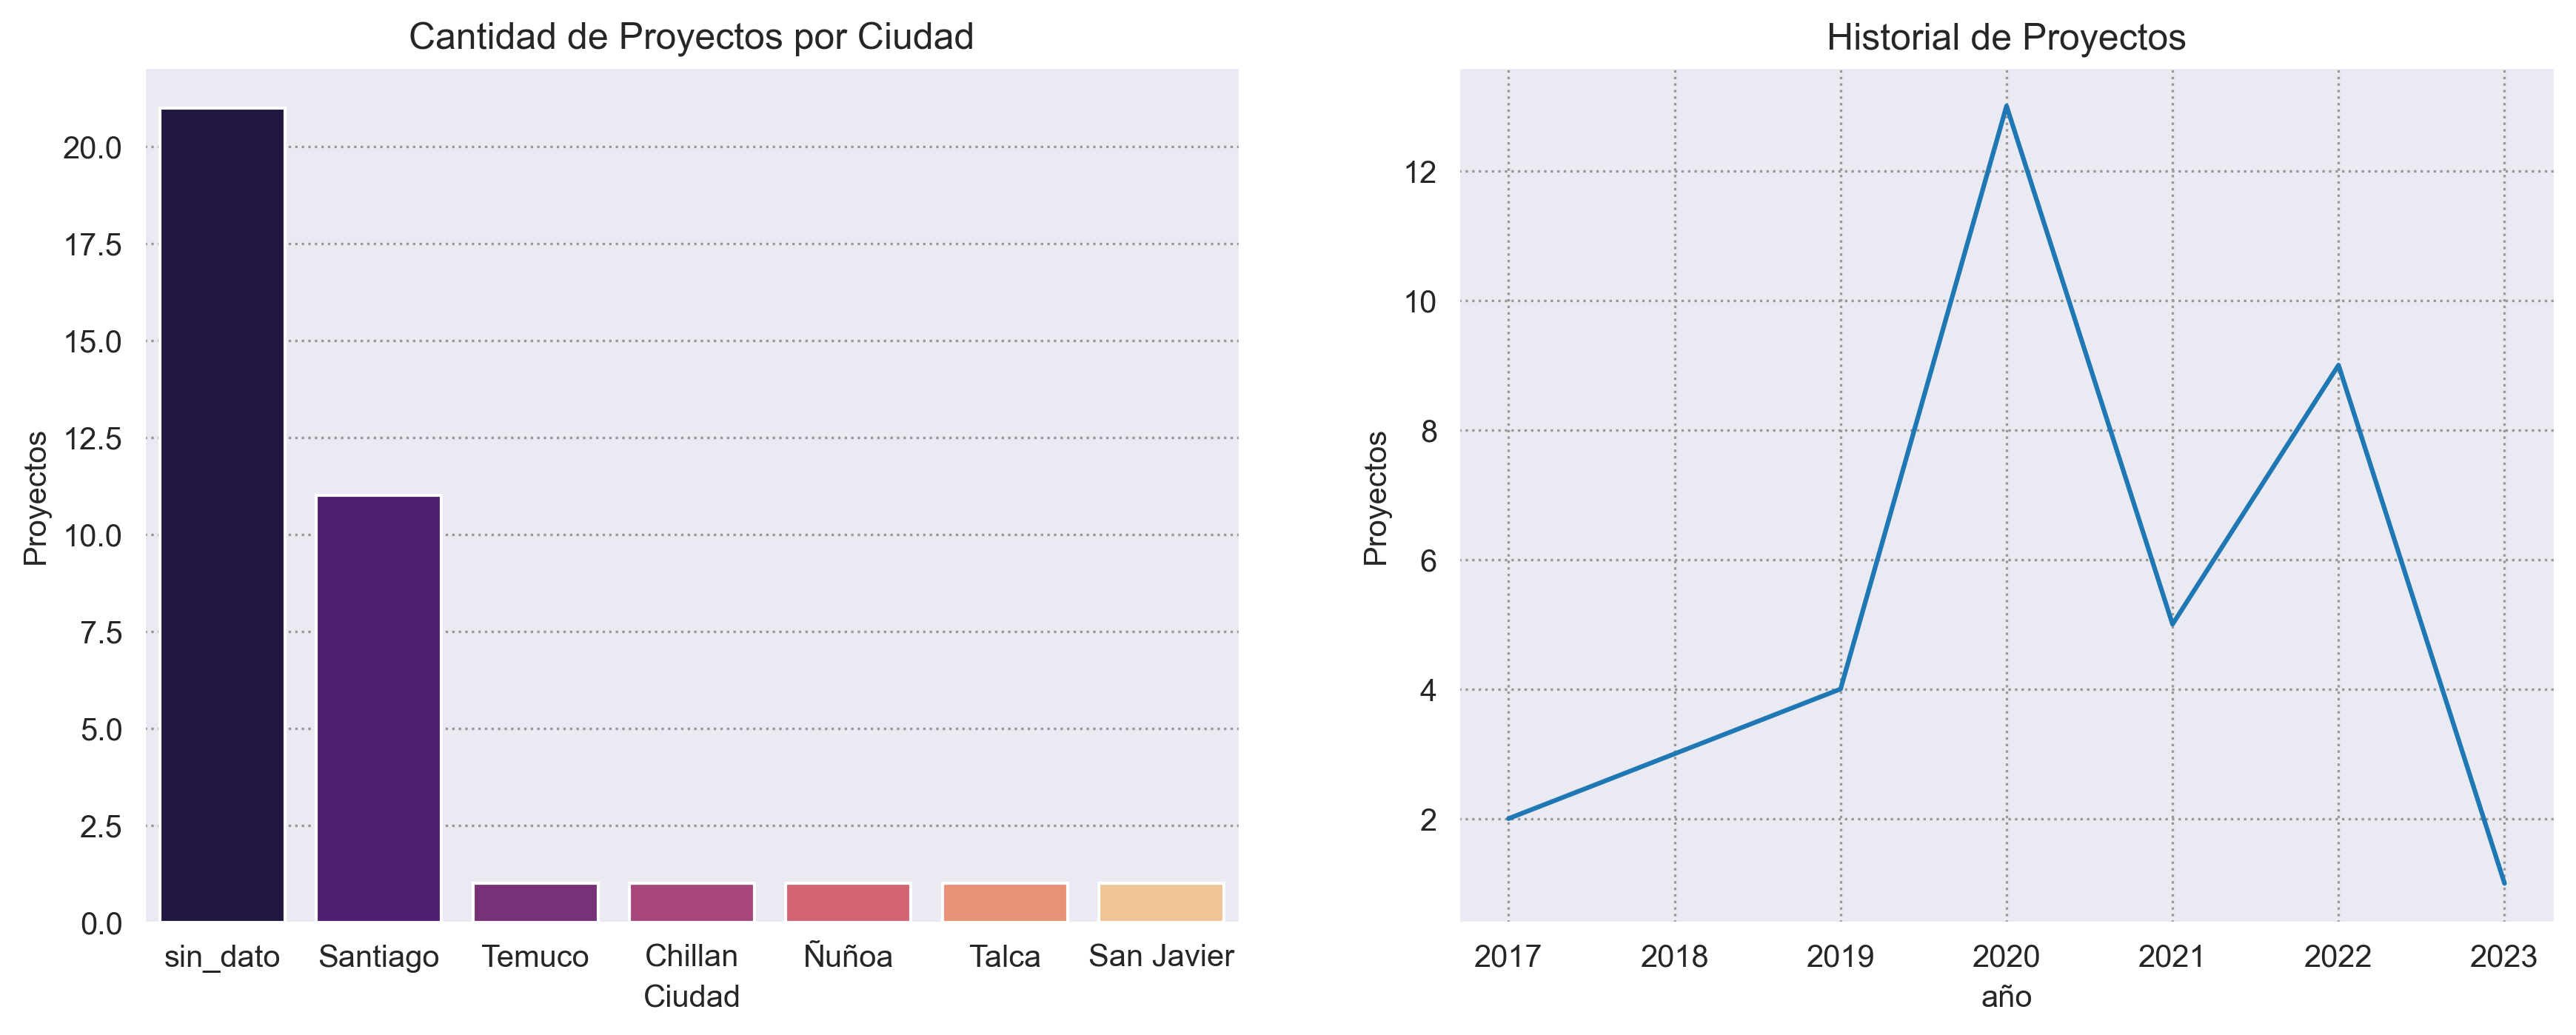

In [1856]:
# graficas

sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"}) # Formato para el Backgound del grafico


# Se crea Subplot de 1*2
fig, ax = plt.subplots(1, 2, figsize=(14, 5),dpi=300)

sns.countplot(x ='CIUDAD', data = proyectos, ax=ax[0],palette="magma",order=proyectos['CIUDAD'].value_counts().index )

 # etiquetas & ejes
ax[0].set_xlabel('Ciudad')
ax[0].set_ylabel('Proyectos')
ax[0].set_title('Cantidad de Proyectos por Ciudad')

sns.lineplot(x ='FECHA_INICIO', data=proyecto, ax=ax[1], y='conteo' )

 # etiquetas & ejes
ax[1].set_xlabel('año')
ax[1].set_ylabel('Proyectos')
ax[1].set_title('Historial de Proyectos')

plt.show()

In [1942]:
cotizacion_1=cotizacion[['FECHA_COTIZ','TOTAL_COTIZ','ID_PROYECTO']]
cotizacion_1['FECHA_COTIZ'] = pd.to_datetime(cotizacion_1['FECHA_COTIZ']).dt.year
cotizacion_1['TOTAL_COTIZ'] = cotizacion_1['TOTAL_COTIZ'].round(2) 


cotizacion_1

C:\Users\Jaime Ospino\AppData\Local\Temp\ipykernel_14504\6766875.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cotizacion_1['FECHA_COTIZ'] = pd.to_datetime(cotizacion_1['FECHA_COTIZ']).dt.year
C:\Users\Jaime Ospino\AppData\Local\Temp\ipykernel_14504\6766875.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cotizacion_1['TOTAL_COTIZ'] = cotizacion_1['TOTAL_COTIZ'].round(2)


,FECHA_COTIZ,TOTAL_COTIZ,ID_PROYECTO
0,2020,3908.13,1
1,2020,4025.37,1
2,2020,2794.00,2
3,2020,2951.98,1
4,2020,2922.46,1
...,...,...,...
95407,2023,4444.37,29
95408,2023,3051.62,29
95409,2023,3036.00,29
95410,2023,3153.00,28


In [1874]:
cotizacion_1_1=cotizacion_1.groupby(['FECHA_COTIZ']).count().reset_index()
cotizacion_1_1

C:\Users\Jaime Ospino\AppData\Local\Temp\ipykernel_14504\2958683593.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cotizacion_1['FECHA_COTIZ'] = pd.to_datetime(cotizacion_1['FECHA_COTIZ']).dt.year


In [1898]:
cotizacion_1_2=cotizacion_1.groupby(['ID_PROYECTO']).count().sort_values(by='FECHA_COTIZ', ascending=False).head(5)
cotizacion_1_2=cotizacion_1_2.reset_index()
cotizacion_1_2

In [1928]:
cotizacion_1_3=cotizacion_1.groupby(['ID_PROYECTO']).sum().sort_values(by='TOTAL_COTIZ', ascending=False).head(5)
cotizacion_1_3=cotizacion_1_3.reset_index()
cotizacion_1_3

,ID_PROYECTO,FECHA_COTIZ,TOTAL_COTIZ
0,6,42314434,84287158.63
1,7,27240209,40001699.71
2,5,15142752,39085537.83
3,4,20888717,37422913.18
4,23,12412794,24130609.20


In [1947]:
cotizacion_1_4=cotizacion_1.groupby(['FECHA_COTIZ']).sum().reset_index()
cotizacion_1_4

,FECHA_COTIZ,TOTAL_COTIZ,ID_PROYECTO
0,2020,1.031360e+08,166711
1,2021,1.256008e+08,388322
2,2022,8.612675e+07,388258
3,2023,3.040002e+07,146376


In [1956]:
# graficas

# Se crea Subplot de 2*2
fig, ax = plt.subplots(2, 2, figsize=(14, 10),dpi=800)

# Grafica 1
sns.lineplot(x ='FECHA_COTIZ', data = cotizacion_1_1, ax=ax[0,0],y='TOTAL_COTIZ' )

 # etiquetas & ejes
ax[0,0].set_xlabel('año')
ax[0,0].set_ylabel('Cantidad de Cotizaciones')
ax[0,0].set_title('Historial de Cotizaciones')

# Grafica 2
sns.barplot(y='ID_PROYECTO', x='FECHA_COTIZ', data=cotizacion_1_2, ax=ax[0,1],orient='h', 
            order=cotizacion_1_2['ID_PROYECTO'].value_counts().index, palette="magma")

 # etiquetas & ejes
ax[0,1].set_xlabel('Cantidad de Cotizaciones')
ax[0,1].set_ylabel('Id del Proyecto')
ax[0,1].set_title('Proyectos con más cotizaciones Top 5')



# Grafica 3
sns.lineplot(x ='FECHA_COTIZ', data = cotizacion_1_4, ax=ax[1,0],y='TOTAL_COTIZ' )

 # etiquetas & ejes
ax[1,0].set_xlabel('año')
ax[1,0].set_ylabel('Monto USD de Cotizaciones')
ax[1,0].set_title('Historial de Monto USD en Cotizaciones')

# establecer etiquetas personalizadas en el eje x
yticklabels_3 =[ '40M','60M','80M', '100M','120M']
yticks_3 =     [ 0.4e8, 0.6e8, 0.8e8, 1e8, 1.2e8]
ax[1,0].set_yticks(yticks_3)
ax[1,0].set_yticklabels(yticklabels_3)

# Grafica 4
sns.barplot(y='ID_PROYECTO', x='TOTAL_COTIZ', data=cotizacion_1_3, ax=ax[1,1],orient='h',
            order=cotizacion_1_3['ID_PROYECTO'].value_counts().index,  palette="magma")

 # etiquetas & ejes
ax[1,1].set_xlabel('Monto USD')
ax[1,1].set_ylabel('Id del Proyecto')
ax[1,1].set_title('Proyectos con más monto USD en cotizaciones Top 5')

# establecer etiquetas personalizadas en el eje x
xticklabels_4 =['0', '10M','20M','30M','40M','50M','60M','70M','80M']
xticks_4 =     [0, 1e7, 2e7, 3e7, 4e7, 5e7,6e7,7e7,8e7]
ax[1,1].set_xticks(xticks_4)
ax[1,1].set_xticklabels(xticklabels_4)

plt.show()